# Metabolomics analysis with GNPS

## Setup

In [1]:
import calour as ca

/Users/amnon/miniconda3/envs/calour/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [3]:
ca.set_log_level('INFO')

## Load the metabolomics bucket table
This is a bucket table exported from GNPS.

We also import the GNPS output file for the gnps data for each metabolite

In [4]:
dat=ca.io.read_gnps_ms(data_file='/Users/amnon/Projects/tal-metabolites/bucket-gnps.tsv',
                       sample_metadata_file='/Users/amnon/Projects/tal-metabolites/map.txt',
                       gnps_file='/Users/amnon/Projects/tal-metabolites/gnps-output.tsv',
                       normalize=None)

2018-03-04 12:21:54 INFO loaded 511 samples, 71 features


In [5]:
print(dat)

MS1Experiment bucket-gnps.tsv with 71 samples, 511 features


## Preprocessing

### Remove low frequency metabolites (features)

In [6]:
datc=dat.cluster_features()

2018-03-04 12:21:55 INFO After filtering, 511 remaining


### sort the samples by relevant fields for the plot

In [7]:
datc=datc.sort_samples('time_days')

In [8]:
datc=datc.sort_samples('batch')

In [9]:
datc=datc.sort_samples('group')

## Plot the data
We set the y-axis (metabolites) to show the GNPS ID of the metabolite (if known) using "feature_field='gnps_name'"

Note once selecting a metabolite (clicking on a row in the heatmap), you can click on the information (i.e. parent mass/etc) to get the appropriate gnps page.

<IPython.core.display.Javascript object>


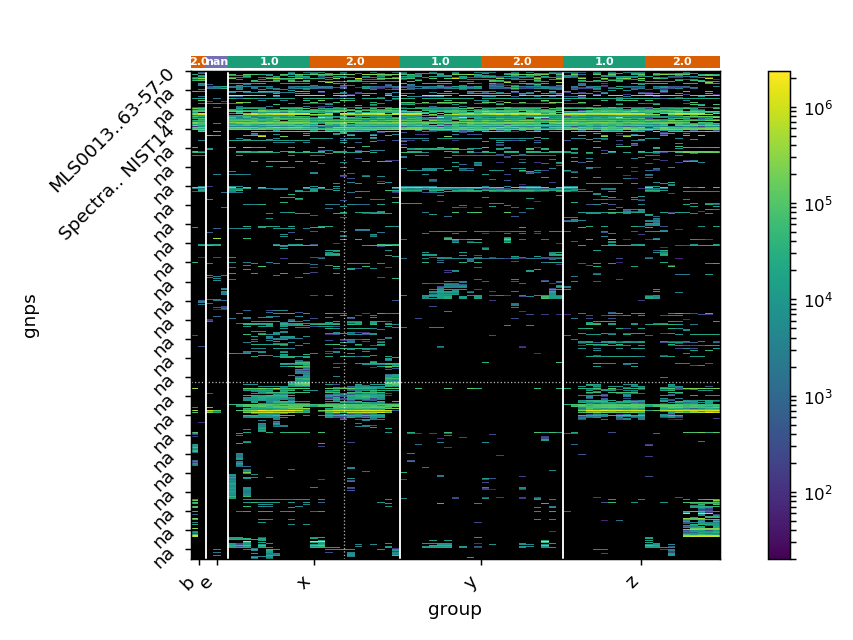

In [10]:
datc.plot(sample_field='group',
          feature_field='gnps_name',
          gui='jupyter',barx_fields=['batch'])